In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_GD(X, y, iterations=1000, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err = np.zeros(iterations)
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err[i-1] = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err[i-1])
    return w, err

def eval_SGD(X, y, iterations=1000, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    err = np.zeros(iterations)
    for i in range(1, iterations + 1):
        err[i-1] = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        if i % (iterations / 10) == 0:
            print(i, w, err[i-1])
    return w, err

def eval_GD_L2(X, y, iterations=1000, alpha=1e-4, lambda_=1):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err = np.zeros(iterations)
    w_err = np.zeros(iterations * X.shape[1]).reshape((iterations, X.shape[1]))
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err[i-1] = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + 2 * lambda_ * w)
        w_err[i-1] = w
        if i % (iterations / 10) == 0:
            print(i, w, err[i-1])
    return w, err, w_err


def eval_GD_L1(X, y, iterations=1000, alpha=1e-4, lambda_=1):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    err = np.zeros(iterations)
    w_err = np.zeros(iterations * X.shape[1]).reshape((iterations, X.shape[1]))
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err[i-1] = calc_mse(y, y_pred)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * np.sign(w))
        w_err[i-1] = w
        if i % (iterations / 10) == 0:
            print(i, w, err[i-1])
    return w, err, w_err



### Задача 1

Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
from sklearn import datasets

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

#### Решение

In [3]:
W_g, err_g = eval_GD(X_, y_)
W_gb, err_gb = eval_SGD(X_, y_)

100 [1.23766997 0.00499459] 1527.5667787094883
200 [1.96503256 0.14526152] 1472.676760466035
300 [2.67905132 0.28259879] 1419.7920422871202
400 [3.37997109 0.41706745] 1368.8393173177496
500 [4.0680322  0.54872726] 1319.7479604439166
600 [4.74347058 0.67763672] 1272.4499301118897
700 [5.40651783 0.80385315] 1226.8796737450361
800 [6.0574013  0.92743266] 1182.9740366262388
900 [6.69634416 1.04843019] 1140.6721741188014
1000 [7.32356549 1.16689954] 1099.9154671034162
100 [1.04408905 0.02755963] 1541.1716547418605
200 [1.92581518 0.32230444] 1474.0236693128834
300 [2.56665969 0.50678814] 1424.36026037972
400 [3.45923961 0.72250004] 1359.3358771551839
500 [4.2973403  0.87620547] 1299.5533077147834
600 [4.9786201  0.97121408] 1252.7072279440076
700 [5.63826497 1.09847818] 1209.2789511358674
800 [6.27791029 1.21778268] 1166.011383870882
900 [6.9546231  1.33869508] 1121.0682283912156
1000 [7.40758474 1.50409189] 1090.6880192538463


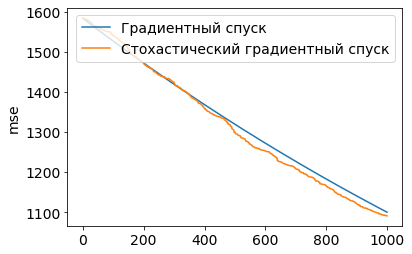

In [4]:
x = np.arange(1000)
plt.plot(x, err_g, label="Градиентный спуск")
plt.plot(x, err_gb, label="Стохастический градиентный спуск")
plt.ylabel("mse")
plt.legend()
plt.show()

### Задача 2

[\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

#### Решение

In [5]:
W_gb_L2, err_gb_L2, w_err_gb_L2 = eval_GD_L2(X_, y_)
W_gb_L1, err_gb_L1, w_err_gb_L1 = eval_GD_L1(X_, y_)

100 [1.22065605 0.00630105] 1528.7800465660396
200 [1.91724046 0.14504549] 1476.0989894337288
300 [2.58750124 0.27820326] 1426.300519679084
400 [3.23243318 0.40599916] 1379.2094649483276
500 [3.85299346 0.52864895] 1334.6621963884365
600 [4.45010312 0.64635972] 1292.5058262480652
700 [5.02464835 0.75933024] 1252.5974630422147
800 [5.57748189 0.86775126] 1214.8035200781442
900 [6.10942423 0.97180589] 1178.9990734497233
1000 [6.62126484 1.07166985] 1145.0672658941871
100 [1.22776056 0.01309499] 1528.170983115527
200 [1.94539551 0.14329917] 1474.1113009106812
300 [2.64986581 0.2707802 ] 1422.0104321568922
400 [3.34141298 0.39559488] 1371.7970946692606
500 [4.02027411 0.51779881] 1323.402606917511
600 [4.68668196 0.63744646] 1276.760792982601
700 [5.340865   0.75459115] 1231.8078909912576
800 [5.9830475  0.86928508] 1188.4824649010388
900 [6.61344965 0.98157938] 1146.72531951317
1000 [7.23228756 1.09152412] 1106.4794185949272


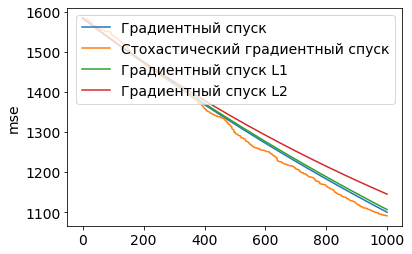

In [6]:
x = np.arange(1000)
plt.plot(x, err_g, label="Градиентный спуск")
plt.plot(x, err_gb, label="Стохастический градиентный спуск")
plt.plot(x, err_gb_L1, label="Градиентный спуск L1")
plt.plot(x, err_gb_L2, label="Градиентный спуск L2")
plt.ylabel("mse")
plt.legend()
plt.show()

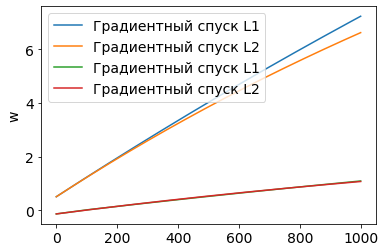

In [7]:
x = np.arange(1000)
plt.plot(x, w_err_gb_L1[:,0], label="Градиентный спуск L1")
plt.plot(x, w_err_gb_L2[:,0], label="Градиентный спуск L2")
plt.plot(x, w_err_gb_L1[:,1], label="Градиентный спуск L1")
plt.plot(x, w_err_gb_L2[:,1], label="Градиентный спуск L2")
plt.ylabel("w")
plt.legend()
plt.show()

Для получения значимых отличий для сгенерированного набора пришлось установить lambda_=1, после этого на графике стал виден более быстрый набор величины веса для L1 регуляции
